# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.weekday() for i in df_select["trans_date_trans_time"]]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-5-e3675718d61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-5-e3675718d61a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.weekday() for i in df_select["trans_date_trans_time"]]


In [6]:
from sklearn.model_selection import train_test_split

# split the data into 70% train and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=441)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [8]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_over = LogisticRegression().fit(over_X, over_y)
log_under = LogisticRegression().fit(under_X, under_y)
log_smote = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [11]:
# Predict the class probabilities for the test data
over_y_pred_prob = log_over.predict_proba(X_test)
under_y_pred_prob = log_under.predict_proba(X_test)
smote_y_pred_prob = log_smote.predict_proba(X_test)

# Predict the classes for the test data
over_y_pred = log_over.predict(X_test)
under_y_pred = log_under.predict(X_test)
smote_y_pred = log_smote.predict(X_test)

In [12]:
# Compute the confusion matrix for the three models
from sklearn.metrics import confusion_matrix

over_confusion_matrix = confusion_matrix(y_test, over_y_pred)
under_confusion_matrix = confusion_matrix(y_test, under_y_pred)
smote_confusion_matrix = confusion_matrix(y_test, smote_y_pred)

# Print out the confusion matrix for the three models
print("Confusion matrix for oversample model:")
print(over_confusion_matrix)
print("Confusion matrix for undersample model:")
print(under_confusion_matrix)
print("Confusion matrix for SMOTE model:")
print(smote_confusion_matrix)

Confusion matrix for oversample model:
[[ 28641 137390]
 [    34    651]]
Confusion matrix for undersample model:
[[ 28114 137917]
 [    34    651]]
Confusion matrix for SMOTE model:
[[130121  35910]
 [   195    490]]


# 5.) Which performed best in Out of Sample metrics?

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the accuracy for each model
over_acc = accuracy_score(y_test, over_y_pred)
under_acc = accuracy_score(y_test, under_y_pred)
smote_acc = accuracy_score(y_test, smote_y_pred)

# Calculate the precision for each model
over_precision = precision_score(y_test, over_y_pred)
under_precision = precision_score(y_test, under_y_pred)
smote_precision = precision_score(y_test, smote_y_pred)

# Calculate the recall for each model
over_recall = recall_score(y_test, over_y_pred)
under_recall = recall_score(y_test, under_y_pred)
smote_recall = recall_score(y_test, smote_y_pred)

# Calculate the F1 score for each model
over_f1 = f1_score(y_test, over_y_pred)
under_f1 = f1_score(y_test, under_y_pred)
smote_f1 = f1_score(y_test, smote_y_pred)

# Calculate the AUC for each model
over_auc = roc_auc_score(y_test, over_y_pred_prob[:,1])
under_auc = roc_auc_score(y_test, under_y_pred_prob[:,1])
smote_auc = roc_auc_score(y_test, smote_y_pred_prob[:,1])

In [14]:
# Store the scores in a dictionary
scores = {'Model': ['Oversample', 'Undersample', 'SMOTE'],
          'Accuracy': [over_acc, under_acc, smote_acc],
          'Precision': [over_precision, under_precision, smote_precision],
          'Recall': [over_recall, under_recall, smote_recall],
          'F1 score': [over_f1, under_f1, smote_f1],
          'AUC': [over_auc, under_auc, smote_auc]}

# Create a dataframe from the dictionary
score_df = pd.DataFrame(scores)
score_df

,Model,Accuracy,Precision,Recall,F1 score,AUC
0,Oversample,0.175700,0.004716,0.950365,0.009385,0.820330
1,Undersample,0.172539,0.004698,0.950365,0.009350,0.820487
2,SMOTE,0.783434,0.013462,0.715328,0.026426,0.813612


Te SMOTE model has a higher accuracy, precision, and F1 score compared to the oversample and undersample models. A high F1 score indicates that the model is making a good balance of correct positive and negative predictions. However, SMOTE model has a lower recall score compared to the other two models. This suggests that the oversample and undersample models may be better at correctly identifying positive instances compared to the SMOTE model. Also, for the AUC score, it can be seen that all three models have an AUC of around 0.82, which is not a very good score. Undersample model has the highest AUC, suggesting that it is a slightly better classifier compared to the other two.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [15]:
# Before SMOTE
raw_temp = pd.concat([X_train, y_train], axis = 1)

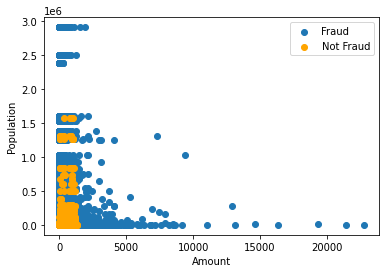

In [16]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"], c = "orange")
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

In [17]:
# After SMOTE
smote_temp = pd.concat([smote_X, smote_y], axis = 1)

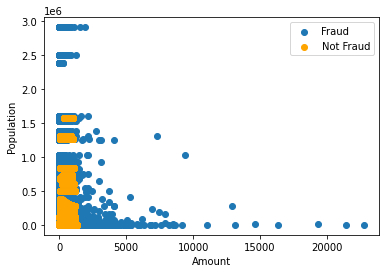

In [18]:
plt.scatter(smote_temp[smote_temp["is_fraud"] == 0]["amt"], smote_temp[smote_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(smote_temp[smote_temp["is_fraud"] == 1]["amt"], smote_temp[smote_temp["is_fraud"] == 1]["city_pop"], c = "orange")
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()